<a href="https://colab.research.google.com/github/abdul-coder/crypto/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [95]:
eeg_df = pd.read_csv('EEG_data.csv')
info_df = pd.read_csv('demographic_info.csv')

In [96]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [97]:
info_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## Merge the data

In [98]:
info_df.rename(columns = {'subject ID' : 'SubjectID'}, inplace=True)

data = info_df.merge(eeg_df, on='SubjectID')

In [99]:
data

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,4,24,Bengali,M,3.0,44.0,34.0,34.0,337285.0,39017.0,5373.0,4186.0,4827.0,4625.0,2308.0,733.0,0.0,1.0
5585,4,24,Bengali,M,3.0,26.0,7.0,-51.0,924079.0,185561.0,3406.0,5125.0,10982.0,12217.0,12094.0,13246.0,0.0,1.0
5586,4,24,Bengali,M,3.0,29.0,23.0,34.0,211892.0,51869.0,31728.0,5757.0,7320.0,6454.0,5977.0,2507.0,0.0,1.0
5587,4,24,Bengali,M,3.0,37.0,17.0,76.0,1964577.0,313204.0,56834.0,20616.0,95236.0,86877.0,12461.0,7061.0,0.0,1.0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5589 entries, 0 to 5588
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           5589 non-null   int64  
 1    age                5589 non-null   int64  
 2    ethnicity          5589 non-null   object 
 3    gender             5589 non-null   object 
 4   VideoID             5589 non-null   float64
 5   Attention           5589 non-null   float64
 6   Mediation           5589 non-null   float64
 7   Raw                 5589 non-null   float64
 8   Delta               5588 non-null   float64
 9   Theta               5588 non-null   float64
 10  Alpha1              5588 non-null   float64
 11  Alpha2              5588 non-null   float64
 12  Beta1               5588 non-null   float64
 13  Beta2               5588 non-null   float64
 14  Gamma1              5588 non-null   float64
 15  Gamma2              5588 non-null   float64
 16  predef

## Cleaning

In [101]:
data = data.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1)

In [102]:
data.head(5)

,age,ethnicity,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [103]:
data.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [104]:
data.rename(columns={' age':'Age', ' ethnicity':'Ethnicity', ' gender':'Gender', 'user-definedlabeln':'Label'}, inplace=True)

In [105]:
data

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,24,Bengali,M,44.0,34.0,34.0,337285.0,39017.0,5373.0,4186.0,4827.0,4625.0,2308.0,733.0,1.0
5585,24,Bengali,M,26.0,7.0,-51.0,924079.0,185561.0,3406.0,5125.0,10982.0,12217.0,12094.0,13246.0,1.0
5586,24,Bengali,M,29.0,23.0,34.0,211892.0,51869.0,31728.0,5757.0,7320.0,6454.0,5977.0,2507.0,1.0
5587,24,Bengali,M,37.0,17.0,76.0,1964577.0,313204.0,56834.0,20616.0,95236.0,86877.0,12461.0,7061.0,1.0


In [106]:
print("Missing values:", data.isna().sum().sum())

Missing values: 9


##Encoding Features

In [107]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [108]:
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == 'M' else 0)

In [109]:
data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [110]:
ethnicity_dummies = pd.get_dummies(data['Ethnicity'])
data = pd.concat([data, ethnicity_dummies], axis=1)
data = data.drop('Ethnicity', axis=1)

In [111]:
data

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,24,1,44.0,34.0,34.0,337285.0,39017.0,5373.0,4186.0,4827.0,4625.0,2308.0,733.0,1.0,1,0,0
5585,24,1,26.0,7.0,-51.0,924079.0,185561.0,3406.0,5125.0,10982.0,12217.0,12094.0,13246.0,1.0,1,0,0
5586,24,1,29.0,23.0,34.0,211892.0,51869.0,31728.0,5757.0,7320.0,6454.0,5977.0,2507.0,1.0,1,0,0
5587,24,1,37.0,17.0,76.0,1964577.0,313204.0,56834.0,20616.0,95236.0,86877.0,12461.0,7061.0,1.0,1,0,0


In [112]:
print("non-numeric columns:", len(data.select_dtypes('object').columns))

non-numeric columns: 0


##EDA

In [113]:
data.dtypes

Age              int64
Gender           int64
Attention      float64
Mediation      float64
Raw            float64
Delta          float64
Theta          float64
Alpha1         float64
Alpha2         float64
Beta1          float64
Beta2          float64
Gamma1         float64
Gamma2         float64
Label          float64
Bengali          uint8
English          uint8
Han Chinese      uint8
dtype: object

In [120]:
features = data.drop('Label', axis=1).copy()
print("Features:", len(features.columns))

Features: 16


In [125]:
categorical_features = ['Age', 'Gender', 'Bengali', 'English', 'Han Chinese']

continuous_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'Bengali', 'English', 'Han Chinese']

print("Categorical Features:", len(categorical_features))
print("Continuos Features:", len(continuous_features))

Categorical Features: 5
Continuos Features: 14


##Univariate Anlaysis

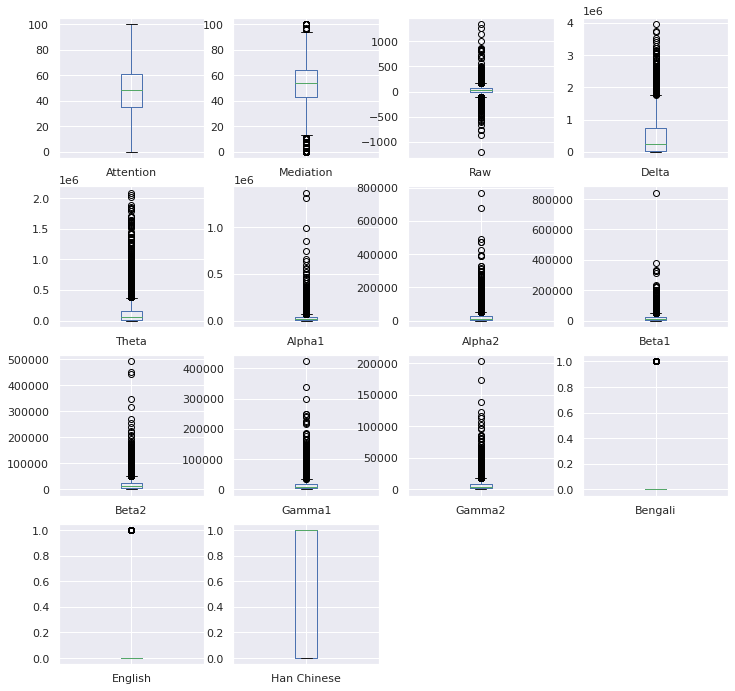

In [151]:
features[continuous_features].plot(kind='box', figsize=(12, 15), subplots=True, layout=(5,4))
plt.show()

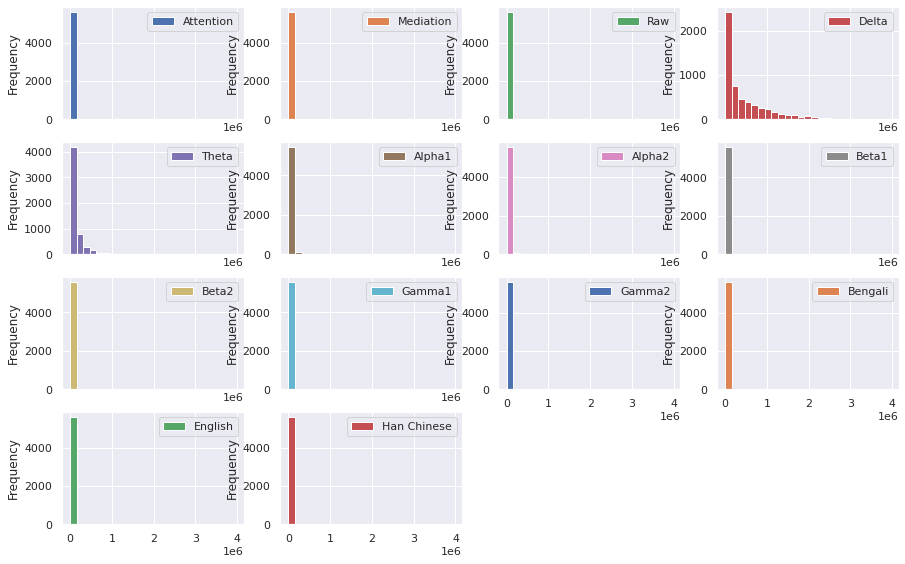

In [149]:
features[continuous_features].plot(kind='hist',bins=25, figsize=(15,12), subplots=True, layout=(5,4))
plt.show()

TypeError: ignored

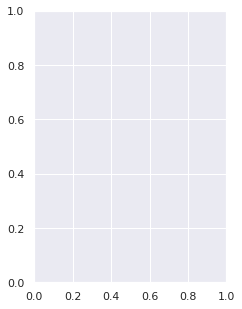

In [162]:
plt.figure(figsize=(20,5))
for feature in categorical_features:
  plt.subplot(1, 5, categorical_features.index(feature) + 1)
  features[feature].value_counts().plot(kind='pie')
plt.show()

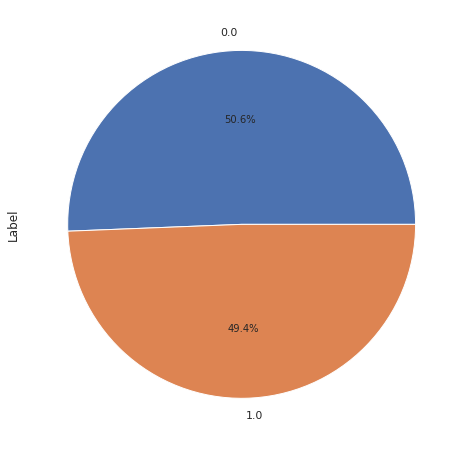

In [164]:
plt.figure(figsize=(8, 8))
data['Label'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

## Multivariate Analysis

In [165]:
plt.figure(figsize=(20,20))
sns.pairplot(features[continuous_features])
plt.show()

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>